In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Heart Failure Prediction

**Reference**
- [Heart Fail:Analysis and Quick-prediction (NAYAN SAKHIYA)](https://www.kaggle.com/code/nayansakhiya/heart-fail-analysis-and-quick-prediction)

## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from IPython.display import display, HTML
import warnings
%matplotlib inline
%config InlineBackend.figure_format='retina'

warnings.filterwarnings("ignore")

### Features
- **age** / continuous / Age of patient
- **anaemia** / integer / No(=0), Yes(=1)
- **creatinine_phosphokinase** / integer
- **diabetes** / integer / No(=0), Yes(=1)
- **ejection_fraction** / integer / %
- **high_blood_pressure** / integer / No(=0), Yes(=1)
- **platelets** / continuous / kiloplateletes/mL
- **serum_creatinine** / continuous / mg/dL
- **serum_sodium** / integer / mEq/L
- **sex** / integer / Male(=1), Female(=0)
- **smoking** / integer / No(=0), Yes(=1)
- **time** / integer / days
- **DEATH_EVENT** / integer / No(=0), Yes(=1)

$ \rightarrow \textbf{'Time' and 'DEATH_EVENT' data are assumed to be correlated}$  
- If the patient **dies**, the observation period(**'time'** data) ends

In [5]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


$\rightarrow \textbf{There is no missing Value}$

In [24]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


$ \rightarrow \textbf{6 Categorical Feature, 7 Numerical Features}$

In [7]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


$ \rightarrow \textbf{A few outliers in the numerical data}$  

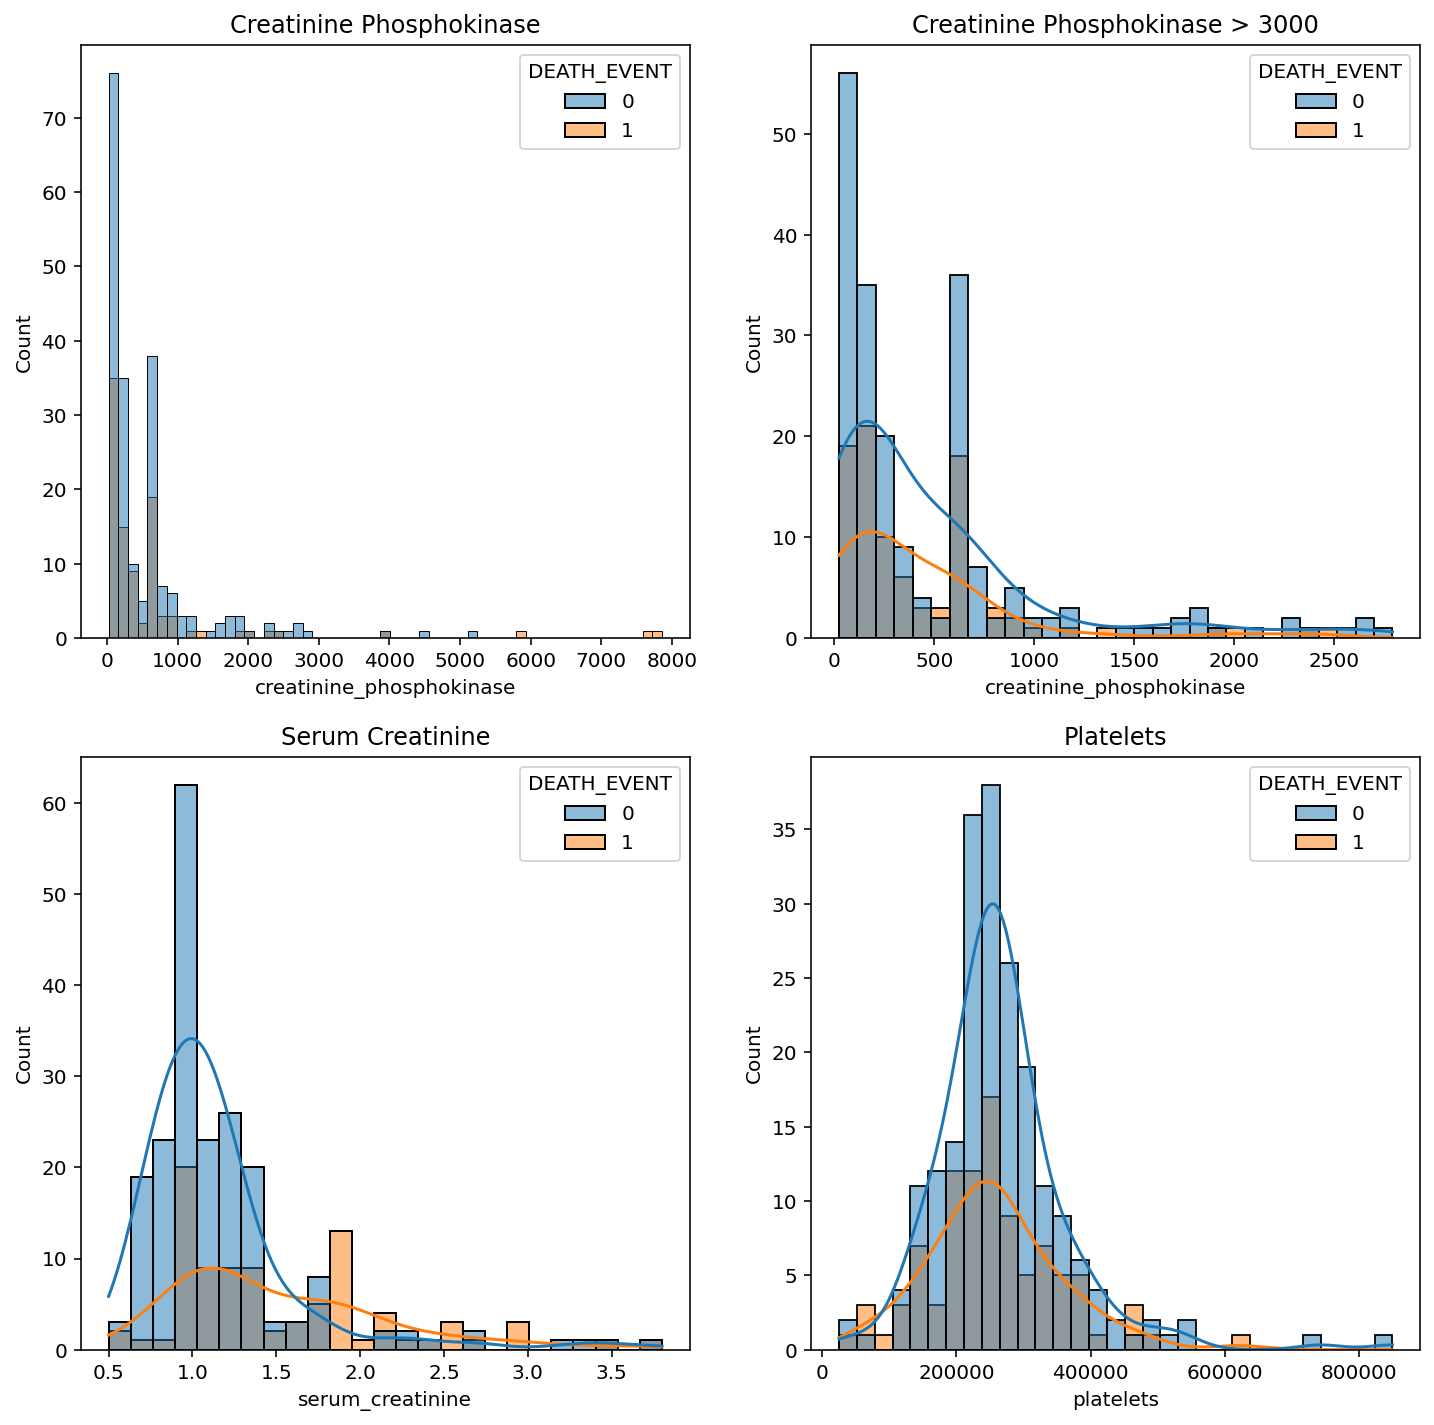

In [33]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title('Creatinine Phosphokinase')
sns.histplot(data = df, x = 'creatinine_phosphokinase', hue = 'DEATH_EVENT')

plt.subplot(2,2,2)
plt.title('Creatinine Phosphokinase > 3000')
sns.histplot(data = df.loc[df['creatinine_phosphokinase']<3000], x = 'creatinine_phosphokinase',
             hue = 'DEATH_EVENT', bins = 30, kde=True)
plt.subplot(2,2,3)
plt.title('Serum Creatinine')
sns.histplot(data = df.loc[df['serum_creatinine']<4], x = 'serum_creatinine', hue = 'DEATH_EVENT', kde=True )

plt.subplot(2,2,4)
plt.title('Platelets')
sns.histplot(data = df, x = 'platelets', hue = 'DEATH_EVENT', kde=True)

plt.show()

<Figure size 360x360 with 0 Axes>

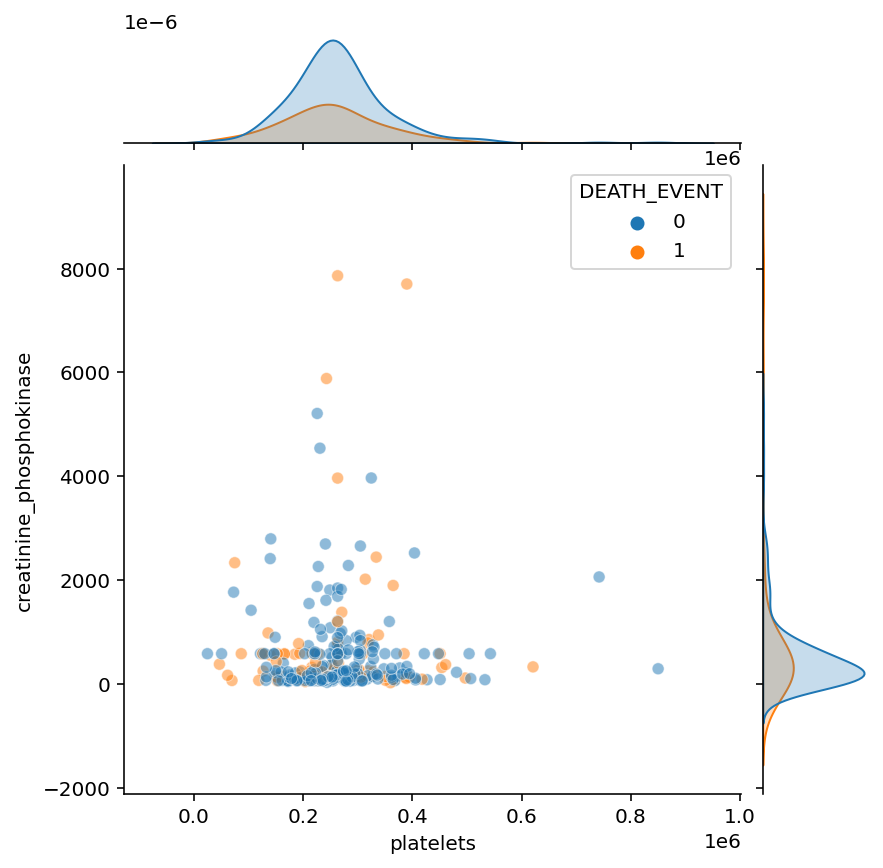

In [41]:
plt.figure(figsize=(5,5))
sns.jointplot(data=df, x = 'platelets', y = 'creatinine_phosphokinase',
              hue='DEATH_EVENT', alpha=0.5)
plt.show()

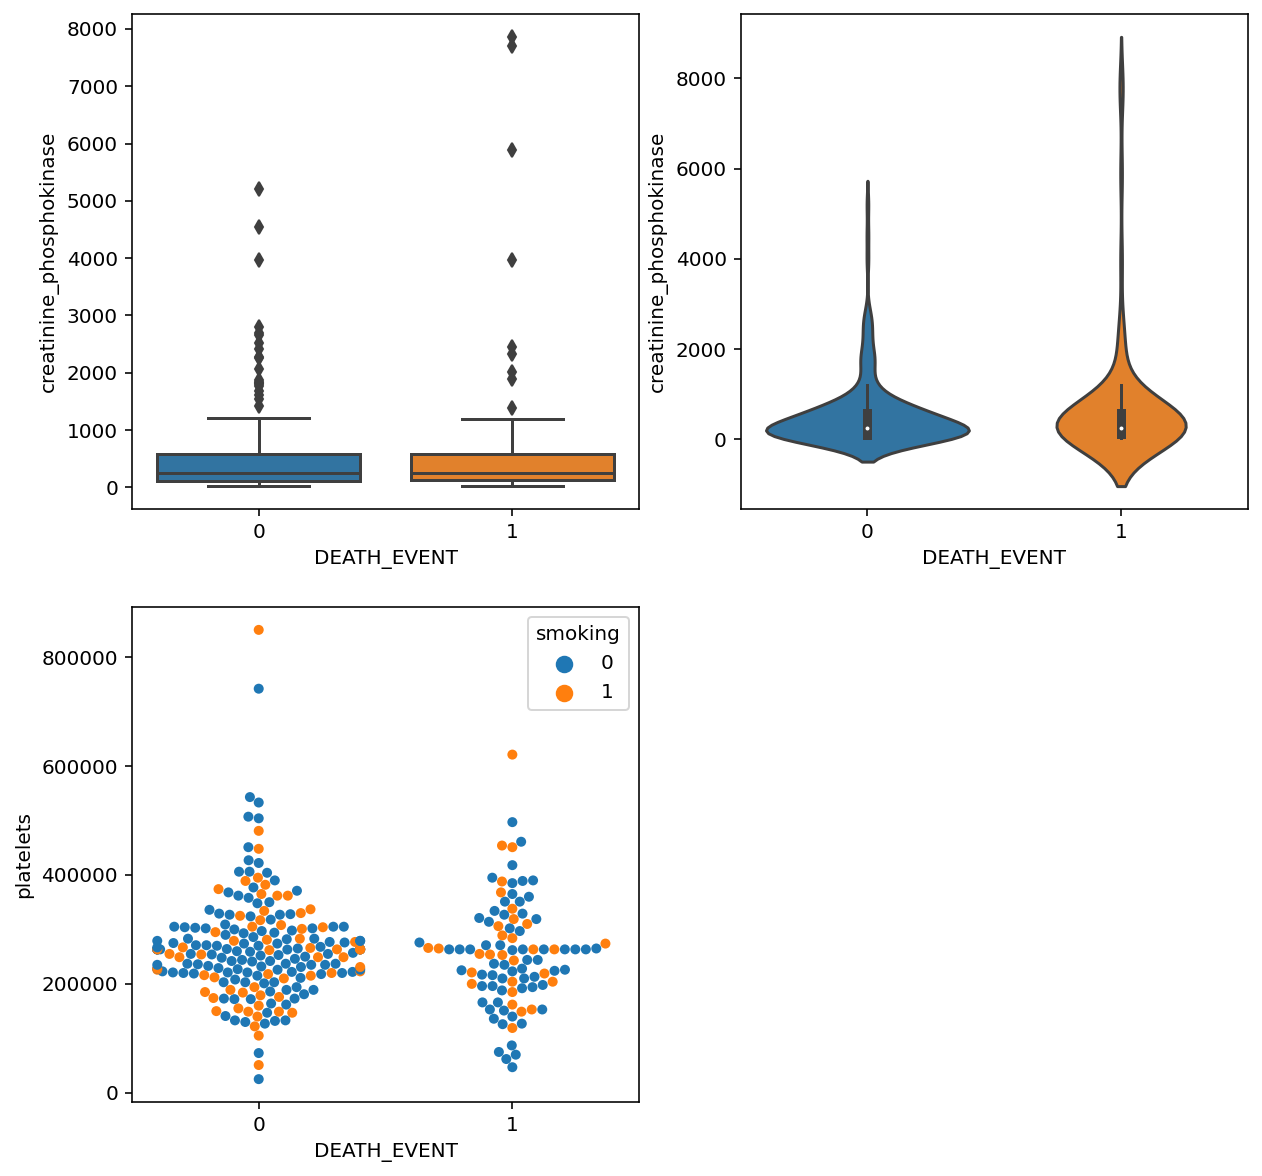

In [47]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'DEATH_EVENT', y = 'creatinine_phosphokinase' )

plt.subplot(2,2,2)
sns.violinplot(data = df, x = 'DEATH_EVENT', y = 'creatinine_phosphokinase' )

plt.subplot(2,2,3)
sns.swarmplot(data = df, x = 'DEATH_EVENT', y = 'platelets', hue='smoking')

plt.show()

In [49]:
"""
profile = ProfileReport(df, title="Profiling Report",
                        dataset={"description":"This profileing report was generated for Jaehwan Jeong",
                                 "copyright_holder":"Jaehwan Jeong",
                                 "copyright_year":"2022"},
                        explorative=True)
profile.to_file("Profile_HeartFailure.html")
"""

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- **Dataset Statistics**
    - Variables = 13
    - Observations = 299
    - Missing cells = 0
    - Duplicate rows = 0
- **Variable types**
    - Numerical = 7
    - Boolean = 6

$\begin{aligned}
    &\textbf{피어슨상관계수} = \cfrac{\textbf{공분산}}{\textbf{표준편차}\boldsymbol{\cdot}\textbf{표준편차}} \\
    \rightarrow \quad &r_{XY} = \cfrac{
                \sum\limits_i ^n{(X_i - \overline X)(Y_i - \overline Y)}
                 }{
                \sqrt{\sum\limits_i ^n{(X_i - \overline X)^2}}
                \sqrt{\sum\limits_i ^n{(Y_i - \overline Y)^2}}
                 } \\
     &\bullet \quad \text{PCC란 두 변수 X와 Y 간의 선형 상관 관계를 계량화한 수치} \\
     &\bullet \quad \text{Cauchy-Schwarz Inequality에 의해 -1~1 사이의 값을 가짐} \\
     &\bullet \quad \text{+1: 완벽한 양의 선형 상관 관계, 하나가 증가할 때 다른 하나도 함께 증가} \\
     &\bullet \quad \text{0 : 상관관계 없음} \\
     &\bullet \quad \text{-1: 완벽한 음의 선형 상관 관계, 하나가 증가할 때 다른 하나는 감소}
\end{aligned}$

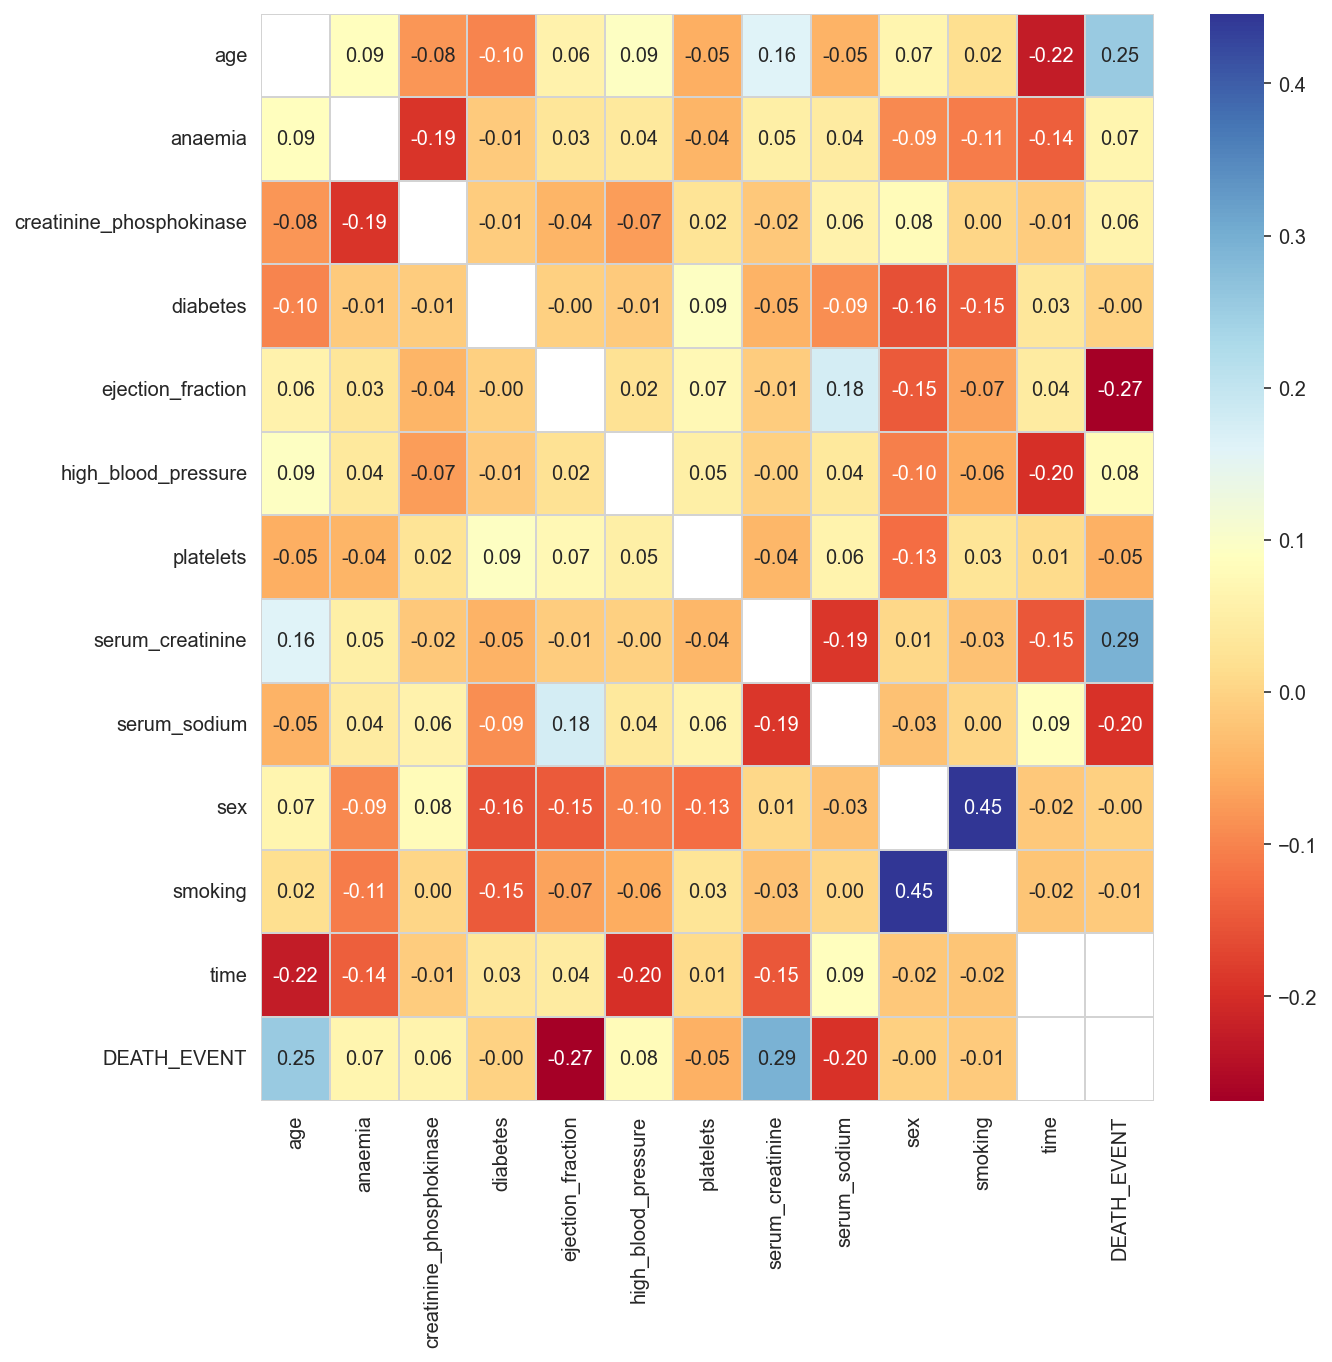

In [72]:
plt.figure(figsize=(10, 10))
sns.set_style('whitegrid', {"axes.facecolor":".0"})
threshold = 0.5
mask = df.corr().where((abs(df.corr())<threshold)).isna()

sns.heatmap(data = df.corr(), # *default: Pearson Correlation
            mask = mask,
            cmap = "RdYlBu",
            annot = True, # write the data value in each cell
            fmt='.2f', # string formatting code to use when adding annotation
            linewidths = 0.2,
            linecolor = 'lightgrey').set_facecolor('white')
plt.show()

$\rightarrow \textbf{Just one feature('time') is correlated with 'DEATH_EVENT'}$